In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [49]:
shampoo = pd.read_csv("shampoo.csv", index_col = [0], parse_dates = True, squeeze = True )

In [6]:
shampoo.head()

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
Name: Sales, dtype: float64

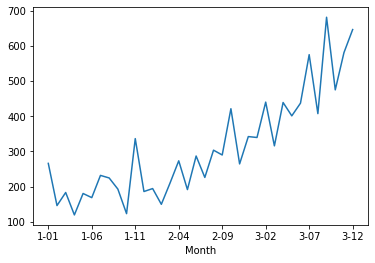

In [7]:
shampoo.plot()

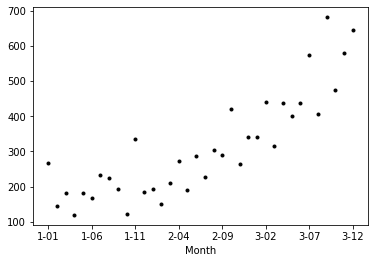

In [8]:
shampoo.plot(style = "k.")

In [9]:
shampoo.size

36

In [10]:
shampoo.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64

In [11]:
shampoo_ma = shampoo.rolling(window = 10).mean()

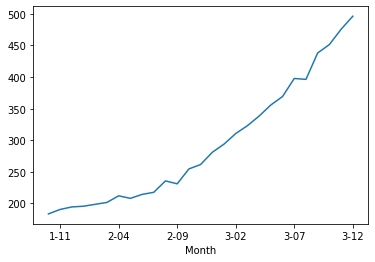

In [12]:
shampoo_ma.plot()

In [13]:
# Naive model - Shift one pt down or use yesterdays data as value for today (Basic Model)
shampoo_base = pd.concat([shampoo, shampoo.shift(1)], axis = 1)

In [14]:
shampoo_base.columns = ["Actual_Sales", "Forecast_Sales"]

In [15]:
shampoo_base = shampoo_base.dropna()

In [16]:
shampoo_base

,Actual_Sales,Forecast_Sales
Month,,
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3
1-07,231.8,168.5
1-08,224.5,231.8
1-09,192.8,224.5
1-10,122.9,192.8


In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
shampoo_error = mean_squared_error(shampoo_base.Actual_Sales, shampoo_base.Forecast_Sales)
shampoo_error

11715.388285714285

In [19]:
np.sqrt(shampoo_error)

108.23764726616282

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

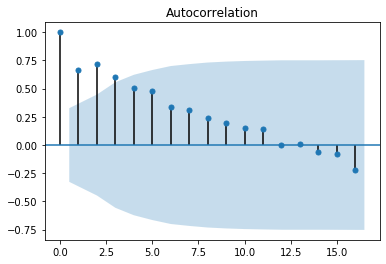

In [21]:
plot_acf(shampoo);

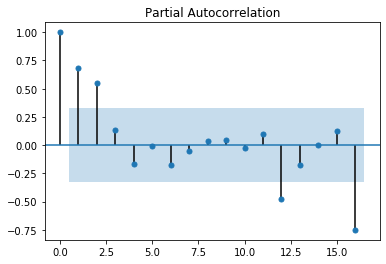

In [22]:
plot_pacf(shampoo);

In [23]:
# p - 2 , q - 3 (reaches the confidence interval) d - 0,2

In [24]:
from statsmodels.tsa.arima_model import ARIMA
shampoo_train, shampoo_test  = shampoo[0:25], shampoo[25:]

In [25]:
shampoo_test.size

11

In [26]:
shampoo_model = ARIMA(shampoo_train, order = (2,1,2))

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [27]:
shampoo_model_fit = shampoo_model.fit()

In [28]:
shampoo_model_fit.aic

276.02797273031615

In [29]:
shampoo_forecast = shampoo_model_fit.forecast(steps = 11 )[0]

In [30]:
shampoo_forecast

array([336.06612431, 322.85856317, 342.52027318, 338.85817107,
       354.29488883, 354.44342689, 366.87170206, 369.4417889 ,
       379.92666396, 384.05711328, 393.28925304])

In [31]:
shampoo_test

Month
3-02    440.4
3-03    315.9
3-04    439.3
3-05    401.3
3-06    437.4
3-07    575.5
3-08    407.6
3-09    682.0
3-10    475.3
3-11    581.3
3-12    646.9
Name: Sales, dtype: float64

In [32]:
np.sqrt(mean_squared_error(shampoo_test, shampoo_forecast))

162.82796691340155

In [68]:
p_values = range(0,5)
d_values = range(0,3)
q_values = range(0,5)


In [69]:
import warnings
warnings.filterwarnings("ignore")

In [72]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            train, test = shampoo[0:25], shampoo[25:36]
            predictions = list()
            for i in range(len(test)):
                try:
                    model = ARIMA(train, order)
                    model_fit = model.fit(disp = 0)
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error = mean_squared_error(test, predictions)
                    print('ARIMA%s MSE = %.2f' % (order, error))
                except:
                    continue

ARIMA(0, 0, 0) MSE = 77950.15
ARIMA(0, 0, 1) MSE = 70119.28
ARIMA(0, 0, 2) MSE = 58566.46
ARIMA(0, 0, 3) MSE = 62031.03
ARIMA(0, 0, 4) MSE = 30922.44
ARIMA(0, 1, 0) MSE = 33849.87
ARIMA(0, 1, 1) MSE = 40654.02
ARIMA(0, 1, 2) MSE = 34511.81
ARIMA(0, 1, 3) MSE = 41466.10
ARIMA(0, 1, 4) MSE = 14452.75
ARIMA(0, 2, 0) MSE = 34017.03
ARIMA(0, 2, 1) MSE = 28392.48
ARIMA(0, 2, 2) MSE = 24224.73
ARIMA(0, 2, 3) MSE = 23023.67
ARIMA(1, 0, 0) MSE = 61158.70
ARIMA(1, 0, 1) MSE = 46528.78
ARIMA(1, 0, 2) MSE = 43922.43
ARIMA(1, 0, 3) MSE = 34856.79
ARIMA(1, 0, 4) MSE = 25186.27
ARIMA(1, 1, 0) MSE = 31687.07
ARIMA(1, 1, 1) MSE = 42176.67
ARIMA(1, 2, 0) MSE = 18845.84
ARIMA(1, 2, 1) MSE = 26129.55
ARIMA(2, 0, 0) MSE = 45248.21
ARIMA(2, 0, 1) MSE = 24762.39
ARIMA(2, 0, 3) MSE = 39728.45
ARIMA(2, 0, 4) MSE = 26399.04
ARIMA(2, 1, 0) MSE = 35488.32
ARIMA(2, 1, 1) MSE = 39633.99
ARIMA(2, 1, 2) MSE = 35884.80
ARIMA(2, 2, 0) MSE = 34024.23
ARIMA(3, 0, 0) MSE = 46326.45
ARIMA(3, 0, 4) MSE = 43204.68
ARIMA(3, 1